<a href="https://colab.research.google.com/github/khizerismail89/Target-SQL-casestudy/blob/main/ScalerMart_KI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [282]:
!jupyter nbconvert --to html /content/ScalerMart_KI.ipynb

[NbConvertApp] Converting notebook /content/ScalerMart_KI.ipynb to html
[NbConvertApp] Writing 1273174 bytes to /content/ScalerMart_KI.html


Problem Statement
ScalerMart, a leading global electronics retailer, has experienced a significant downturn in sales, with a nearly 50% decline in revenue in 2020 compared to the previous year.

In response to this challenge, the company is actively seeking a sharp Data Analyst to join their growing team.

You have been assigned the task of analyzing the customer-level transactional data to identify potential reasons behind the decline in sales.

Your objective is to recommend data-driven strategies aimed at improving sales performance.


In [177]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
import datetime as dt
import scipy.stats as stats

In [178]:
## Reading the casv datasets
cust = pd.read_csv("Customers.csv", encoding="latin-1")
sales = pd.read_csv("Sales.csv")
prod = pd.read_csv("Products.csv")

In [179]:
cust.head()

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,7/3/1939
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,9/27/1979
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,5/26/1947
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,9/17/1957
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,11/19/1965


In [180]:
sales.head()

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,1/1/2016,NaN,265598,10,1304,1,CAD
1,366001,1,1/1/2016,1/13/2016,1269051,0,1048,2,USD
2,366001,2,1/1/2016,1/13/2016,1269051,0,2007,1,USD
3,366002,1,1/1/2016,1/12/2016,266019,0,1106,7,CAD
4,366002,2,1/1/2016,1/12/2016,266019,0,373,1,CAD


In [181]:
prod.head()

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,$6.62,$12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,$6.62,$12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,$7.40,$14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,$11.00,$21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,$11.00,$21.57,101,MP4&MP3,1,Audio


In [182]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15266 entries, 0 to 15265
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CustomerKey  15266 non-null  int64 
 1   Gender       15266 non-null  object
 2   Name         15266 non-null  object
 3   City         15266 non-null  object
 4   State Code   15256 non-null  object
 5   State        15266 non-null  object
 6   Zip Code     15266 non-null  object
 7   Country      15266 non-null  object
 8   Continent    15266 non-null  object
 9   Birthday     15266 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.2+ MB


In [183]:
cust.nunique()

CustomerKey    15266
Gender             2
Name           15118
City            8258
State Code       467
State            512
Zip Code        9505
Country            8
Continent          3
Birthday       11270
dtype: int64

In [184]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Order Number   62884 non-null  int64 
 1   Line Item      62884 non-null  int64 
 2   Order Date     62884 non-null  object
 3   Delivery Date  13165 non-null  object
 4   CustomerKey    62884 non-null  int64 
 5   StoreKey       62884 non-null  int64 
 6   ProductKey     62884 non-null  int64 
 7   Quantity       62884 non-null  int64 
 8   Currency Code  62884 non-null  object
dtypes: int64(6), object(3)
memory usage: 4.3+ MB


In [185]:
prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ProductKey      2517 non-null   int64 
 1   Product Name    2517 non-null   object
 2   Brand           2517 non-null   object
 3   Color           2517 non-null   object
 4   Unit Cost USD   2517 non-null   object
 5   Unit Price USD  2517 non-null   object
 6   SubcategoryKey  2517 non-null   int64 
 7   Subcategory     2517 non-null   object
 8   CategoryKey     2517 non-null   int64 
 9   Category        2517 non-null   object
dtypes: int64(3), object(7)
memory usage: 196.8+ KB


In [186]:
cust.isna().sum()

CustomerKey     0
Gender          0
Name            0
City            0
State Code     10
State           0
Zip Code        0
Country         0
Continent       0
Birthday        0
dtype: int64

In [187]:
sales.isna().sum()

Order Number         0
Line Item            0
Order Date           0
Delivery Date    49719
CustomerKey          0
StoreKey             0
ProductKey           0
Quantity             0
Currency Code        0
dtype: int64

In [188]:
prod.isna().sum()

ProductKey        0
Product Name      0
Brand             0
Color             0
Unit Cost USD     0
Unit Price USD    0
SubcategoryKey    0
Subcategory       0
CategoryKey       0
Category          0
dtype: int64

We could observe that the table 'Products' does not have any Null values where as the table 'Customer' has 10 Null values in the column 'State Code' and the table 'Sales' has 49719 Null values in the column 'Delivery Date'. We can see later how this could be fixed.

# Data preprocessing and analysis

In [189]:
# dropping the column 'State Code' in the Customer table
# dropping the column 'Delivery Date' in the sales table
# dropping the column 'CategoryKey', 'color' in the products table
cust = cust.drop(columns = ['State Code'])
sales = sales.drop(columns = ['Delivery Date', 'StoreKey'])
prod = prod.drop(columns = ['CategoryKey', 'Color'])

In [190]:
#coverting the relevant date time column to datetime format for easy calculation and analysis
cust['Birthday'] = pd.to_datetime(cust['Birthday'])
# sales['Delivery Date'] = pd.to_datetime(sales['Delivery Date'])
sales['Order Date'] = pd.to_datetime(sales['Order Date'])

In [191]:
## merging sales and prod tables to calculate revenue
sales_prod = pd.merge(sales,prod, on =['ProductKey'], how = 'left')
sales_prod.head(2)

,Order Number,Line Item,Order Date,CustomerKey,ProductKey,Quantity,Currency Code,Product Name,Brand,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,Category
0,366000,1,2016-01-01,265598,1304,1,CAD,Contoso Lens Adapter M450 White,Contoso,$31.27,$68.00,406,Cameras & Camcorders Accessories,Cameras and camcorders
1,366001,1,2016-01-01,1269051,1048,2,USD,A. Datum SLR Camera X136 Silver,A. Datum,$141.47,$427.00,402,Digital SLR Cameras,Cameras and camcorders


# Feature engineering

In [192]:
#creating customer age column
cust['Age'] = pd.Timestamp.now().year - cust['Birthday'].dt.year

In [193]:
def ageCat(x):
  if x >= 75:
    return 'Super senior'
  elif 60 >= x < 75:
    return 'Senior'
  elif 40 >= x< 60:
    return 'Middle-aged'
  elif 25 >= x < 40:
    return 'Young adults'
  elif 18 >= x < 25:
    return 'Youth'
  elif 13>= x <18:
    return 'Teen age'
  else:
    return 'Children'

In [236]:
def spentCap(x):
  if x <= 100:
    return 'Poor spender'
  elif  100 > x <= 1000:
    return 'Low Spender'
  elif 1000 > x <= 5000:
    return 'Moderate Spender'
  elif 5000 > x <= 10000:
    return 'Average Spender'
  else:
    return 'High Spender'

In [194]:
#creating customer age group column
cust['Age_group'] = cust.apply(lambda x: ageCat(x['Age']), axis=1)

In [195]:
#Creating a feature with order year
sales_prod['Order_year'] = (sales['Order Date']).dt.year

In [196]:
## data cleaning to convert the cost and price columns to numeric fields for better calculations
sales_prod['Unit Cost USD'] = sales_prod['Unit Cost USD'] .str.replace('$', '')
sales_prod['Unit Cost USD'] = sales_prod['Unit Cost USD'] .str.replace(',', '')
sales_prod['Unit Price USD'] = sales_prod['Unit Price USD'] .str.replace('$', '')
sales_prod['Unit Price USD'] = sales_prod['Unit Price USD'] .str.replace(',', '')

In [197]:
#actual data type conversion
sales_prod['Unit Cost USD'] = sales_prod['Unit Cost USD'].astype(float)
sales_prod['Unit Price USD'] = sales_prod['Unit Price USD'].astype(float)

In [198]:
## feature engineering to calculate the cost price and selling price of the products sold
sales_prod['total_cost'] = sales_prod['Quantity'] * sales_prod['Unit Cost USD']
sales_prod['total_price'] = sales_prod['Quantity'] * sales_prod['Unit Price USD']

sales_prod.head()

,Order Number,Line Item,Order Date,CustomerKey,ProductKey,Quantity,Currency Code,Product Name,Brand,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,Category,Order_year,total_cost,total_price
0,366000,1,2016-01-01,265598,1304,1,CAD,Contoso Lens Adapter M450 White,Contoso,31.27,68.00,406,Cameras & Camcorders Accessories,Cameras and camcorders,2016,31.27,68.00
1,366001,1,2016-01-01,1269051,1048,2,USD,A. Datum SLR Camera X136 Silver,A. Datum,141.47,427.00,402,Digital SLR Cameras,Cameras and camcorders,2016,282.94,854.00
2,366001,2,2016-01-01,1269051,2007,1,USD,Fabrikam Microwave 1.5CuFt X1100 Black,Fabrikam,220.64,665.94,803,Microwaves,Home Appliances,2016,220.64,665.94
3,366002,1,2016-01-01,266019,1106,7,CAD,Contoso SLR Camera M146 Orange,Contoso,148.08,322.00,402,Digital SLR Cameras,Cameras and camcorders,2016,1036.56,2254.00
4,366002,2,2016-01-01,266019,373,1,CAD,Adventure Works Laptop8.9 E0890 White,Adventure Works,166.20,326.00,301,Laptops,Computers,2016,166.20,326.00


# In depth Analysis

In [199]:
print("Start year of dataframe", sales_prod['Order_year'].min())
print("End year of dataframe", sales_prod['Order_year'].max())

Start year of dataframe 2016
End year of dataframe 2021


In [270]:
sales_prod['Order Date'].max()

Timestamp('2021-02-20 00:00:00')

In [200]:
# calculating the revenue generated per year from the scalerMart store
revenue_per_year = pd.DataFrame(sales_prod.groupby(['Order_year'])['total_price'].
                                transform('sum').drop_duplicates().reset_index())
revenue_per_year.rename(columns = {'index': 'Year', 'total_price':'Revenue_generated'}, inplace = True)
years = range(2016, 2022)
revenue_per_year['Year'] = [i for i in years]
revenue_per_year['Percentage_change'] = round(revenue_per_year['Revenue_generated'].pct_change() * 100,2)
revenue_per_year

,Year,Revenue_generated,Percentage_change
0,2016,6946793.56,NaN
1,2017,7421422.27,6.83
2,2018,12788960.66,72.32
3,2019,18264382.48,42.81
4,2020,9294632.14,-49.11
5,2021,1039288.48,-88.82


In [238]:
#merging all the three dataframes so that we now have all the data of sales per product per customer
full_df = pd.merge(sales_prod, cust, on = ['CustomerKey'], how = 'left')
full_df.head(2)

,Order Number,Line Item,Order Date,CustomerKey,ProductKey,Quantity,Currency Code,Product Name,Brand,Unit Cost USD,...,Gender,Name,City,State,Zip Code,Country,Continent,Birthday,Age,Age_group
0,366000,1,2016-01-01,265598,1304,1,CAD,Contoso Lens Adapter M450 White,Contoso,31.27,...,Male,Tyler Vaught,London,Ontario,N5W 5K6,Canada,North America,1971-03-23,53,Senior
1,366001,1,2016-01-01,1269051,1048,2,USD,A. Datum SLR Camera X136 Silver,A. Datum,141.47,...,Male,Frank Upchurch,Auberry,California,93602,United States,North America,1995-11-20,29,Senior


In [202]:
full_df.drop(columns = ['Unit Cost USD', 'Unit Price USD','Zip Code','Quantity',
                        'Currency Code','SubcategoryKey','Birthday', 'Line Item'],inplace = True)

In [203]:
full_df.nunique()

Order Number    26326
Order Date       1641
CustomerKey     11887
ProductKey       2492
Product Name     2492
Brand              11
Subcategory        32
Category            8
Order_year          6
total_cost       3853
total_price      3125
Gender              2
Name            11783
City             6570
State             491
Country             8
Continent           3
Age                68
Age_group           3
dtype: int64

We could understand from the earlier data and from the above data that out of 15266 registered customers in ScalerMart the active ones which have atleast orderd a single item till now are just 11887.

In [204]:
print('\033[91m'+'\033[1m'+ f"There are {15266-11887} customers who are inactive customers currently!" +'\033[0m' )

There are 3379 customers who are inactive customers currently!


In [205]:
## Percentage of active customers who are purchasing
round(full_df.Country.value_counts(normalize = True),2)*100

Country
United States     54.0
United Kingdom    13.0
Germany            9.0
Canada             9.0
Australia          5.0
Italy              4.0
Netherlands        4.0
France             3.0
Name: proportion, dtype: float64

In [267]:
pd.DataFrame(round(full_df.Age_group.value_counts(normalize = True)*100,2)).reset_index()

,Age_group,proportion
0,Senior,57.43
1,Super senior,21.72
2,Children,20.84


In [206]:
#Analysis to showcase the revenue generated per year per active customer base by country
revenue_year_country = pd.DataFrame(full_df.groupby(['Country', 'Order_year'])['total_price'].transform('sum'))

result_df = pd.concat([full_df[['Country', 'Order_year']], revenue_year_country], axis=1)
result_df = result_df.drop_duplicates()
result_df = result_df.rename(columns={'total_price': 'Total Revenue', 'Order_year': 'Year'})
result_df


## Top 20 positions which generated most of the revenue
result_df.sort_values(by =['Country', 'Total Revenue'], ascending = False).head(20)

,Country,Year,Total Revenue
29036,United States,2019,10133066.38
14847,United States,2018,6614325.57
50646,United States,2020,5268961.03
6910,United States,2017,3857326.09
1,United States,2016,3350947.10
61677,United States,2021,647005.00
29066,United Kingdom,2019,2041930.51
14860,United Kingdom,2018,1697046.79
6905,United Kingdom,2017,1138510.39
6,United Kingdom,2016,1099291.68


In [207]:
## Bottom 20 positions which generated the least revenue
result_df.sort_values(by =['Country', 'Total Revenue'], ascending = False).tail(20)

,Country,Year,Total Revenue
6906,Germany,2017,584342.17
61672,Germany,2021,73787.64
29276,France,2019,474990.53
50685,France,2020,325201.98
14855,France,2018,312786.49
38,France,2016,188645.05
6960,France,2017,184863.72
61684,France,2021,28850.45
29054,Canada,2019,1502227.97
14889,Canada,2018,1100914.05


In [208]:
# analysis to show which country has the most percentage change between 2019 to 2020 and 2020 to 2021

# Filter data for years 2019, 2020, and 2021
filtered_df = result_df[result_df['Year'].isin([2019, 2020, 2021])]

# Pivot the DataFrame to have years as columns
pivoted_df = filtered_df.pivot(index='Country', columns='Year', values='Total Revenue')

# Calculate percentage decline between consecutive years
pct_decline_1920 = round(((pivoted_df[2020] - pivoted_df[2019]) / pivoted_df[2019]) * 100,2)
pct_decline_2021 = round(((pivoted_df[2021] - pivoted_df[2020]) / pivoted_df[2020]) * 100,2)

# Combine the percentage declines into a single DataFrame
decline_df = pd.DataFrame({'% Decline_2019_to_2020': pct_decline_1920, '% Decline_2020_to_2021': pct_decline_2021})

# Display the result
decline_df

,% Decline_2019_to_2020,% Decline_2020_to_2021
Country,,
Australia,-50.50,-90.45
Canada,-50.12,-87.47
France,-31.54,-91.13
Germany,-54.50,-91.35
Italy,-56.60,-94.49
Netherlands,-46.09,-89.80
United Kingdom,-50.75,-89.90
United States,-48.00,-87.72


In [269]:
# creating a df for total count of each customer
customer_total_order_count  = full_df.groupby(['CustomerKey'])['Order_year'].transform('count')
# customer_total_order_count

x = pd.DataFrame({'CustomerKey': full_df['CustomerKey'],'Age_group': full_df['Age_group'],'Country':full_df['Country'],
                  'Total_count': customer_total_order_count}).drop_duplicates()

##creating a df for total price for each customer
customer_total_price = full_df.groupby('CustomerKey')['total_price'].transform('sum')
y = pd.DataFrame({'CustomerKey': full_df['CustomerKey'], 'Total_price': customer_total_price}).drop_duplicates()

# creating apivot table for count of each order per customer key
customer_order_count = full_df.groupby(['CustomerKey', 'Order_year']).size().unstack(fill_value=0).reset_index().drop_duplicates()

# Merge total price for each customer with total count of each customer and count per year for each customer

total_customer_order_count = pd.merge(x,y,on='CustomerKey')
total_customer_purcahse = pd.merge(total_customer_order_count,customer_order_count, on ='CustomerKey')

## top 25 customers whose purchase history are denoted below
total_customer_purcahse.sort_values(by=['Total_count', 'Total_price'], ascending=[False, False]).head(25)

,CustomerKey,Age_group,Country,Total_count,Total_price,2016,2017,2018,2019,2020,2021
492,723572,Senior,Italy,36,40225.01,4,7,7,6,9,3
4469,1579183,Senior,United States,32,35780.33,0,5,4,20,3,0
755,1925694,Super senior,United States,32,26339.39,9,0,0,11,5,7
667,1492176,Senior,United States,29,29985.50,1,6,18,1,3,0
4700,1972249,Senior,United States,29,28869.45,0,1,10,12,6,0
412,1942072,Super senior,United States,29,25079.21,4,5,9,1,10,0
2371,2080484,Children,United States,29,19536.34,3,2,6,14,4,0
2480,1521733,Super senior,United States,29,17474.39,1,0,14,11,3,0
1152,793686,Senior,Italy,28,13097.44,10,4,4,10,0,0
3666,382960,Senior,Canada,28,11543.16,0,4,2,19,3,0


In [211]:
## bottom 25 customers whose purchase history are denoted below
total_customer_purcahse.sort_values('Total_price', ascending = False).tail(25)

,CustomerKey,Age_group,Country,Total_count,Total_price,2016,2017,2018,2019,2020,2021
10520,1667179,Children,United States,1,6.99,0,0,0,1,0,0
6788,38006,Children,Australia,1,6.99,0,0,1,0,0,0
11752,1671068,Senior,United States,1,6.95,0,0,0,0,1,0
10311,1449784,Senior,United States,1,6.95,0,0,0,1,0,0
6096,45781,Super senior,Australia,1,6.89,0,0,1,0,0,0
6840,400656,Senior,Germany,1,6.89,0,0,1,0,0,0
7921,675714,Senior,France,1,6.88,0,0,1,0,0,0
10328,1485014,Senior,United States,1,6.88,0,0,0,1,0,0
2049,777904,Children,Italy,1,6.88,1,0,0,0,0,0
11166,1280813,Senior,United States,1,5.50,0,0,0,0,1,0


We can clearly observe that the customers who have made purchases in the 2020 are only the repeat customers. We can hardly find any new customers making big purchases in 2020 or 2021.

In [226]:
def custCat(x):
  if x == 1:
    return 'Single time buyer'
  elif 5 >= x >1:
    return 'Moderate buyer'
  elif 6>= x > 10:
    return 'Average buyer'
  else:
    return 'High ticket buyer'

In [231]:
## customer segmentation
total_customer_purcahse['cust_segment'] = total_customer_purcahse.apply(lambda x: custCat(x['Total_count']), axis =1 )
round(total_customer_purcahse['cust_segment'].value_counts(normalize = True),2)*100

cust_segment
Moderate buyer       49.0
High ticket buyer    38.0
Single time buyer    13.0
Name: proportion, dtype: float64

In [244]:
full_df['Purchase_Capacity'] = full_df.apply(lambda x: spentCap(x['total_price']), axis=1)
round(full_df['Purchase_Capacity'].value_counts(normalize = True)*100,2)

Purchase_Capacity
Moderate Spender    52.60
Poor spender        23.41
Average Spender     21.56
High Spender         2.43
Name: proportion, dtype: float64

In [212]:
full_df[full_df['CustomerKey']==1098687 ][['Product Name', 'Brand', 'Subcategory', 'Category']]

,Product Name,Brand,Subcategory,Category
2575,Contoso Coffee Maker Auto 5C E0900 Grey,Contoso,Coffee Machines,Home Appliances
2576,Adventure Works Desktop PC2.33 XD233 Brown,Adventure Works,Desktops,Computers
2577,Contoso Microwave 1.5CuFt X0110 Grey,Contoso,Microwaves,Home Appliances
2578,Contoso DVD 9-Inch Player Portable M300 Silver,Contoso,Movie DVD,"Music, Movies and Audio Books"
2579,Fabrikam Refrigerator 4.6CuFt E2800 Silver,Fabrikam,Refrigerators,Home Appliances
2580,MGS Dungeon Siege II E105,Tailspin Toys,Download Games,Games and Toys
9929,WWI 2GB Pulse Smart pen M100 Black,Wide World Importers,Recording Pen,Audio
9930,Contoso Water Heater 1.5GPM E0800 Green,Contoso,Water Heaters,Home Appliances
21024,Adventure Works Desktop PC2.33 XD233 Silver,Adventure Works,Desktops,Computers
33812,The Phone Company Smart phones Expert M400 Grey,The Phone Company,Smart phones & PDAs,Cell phones


# Visual analysis

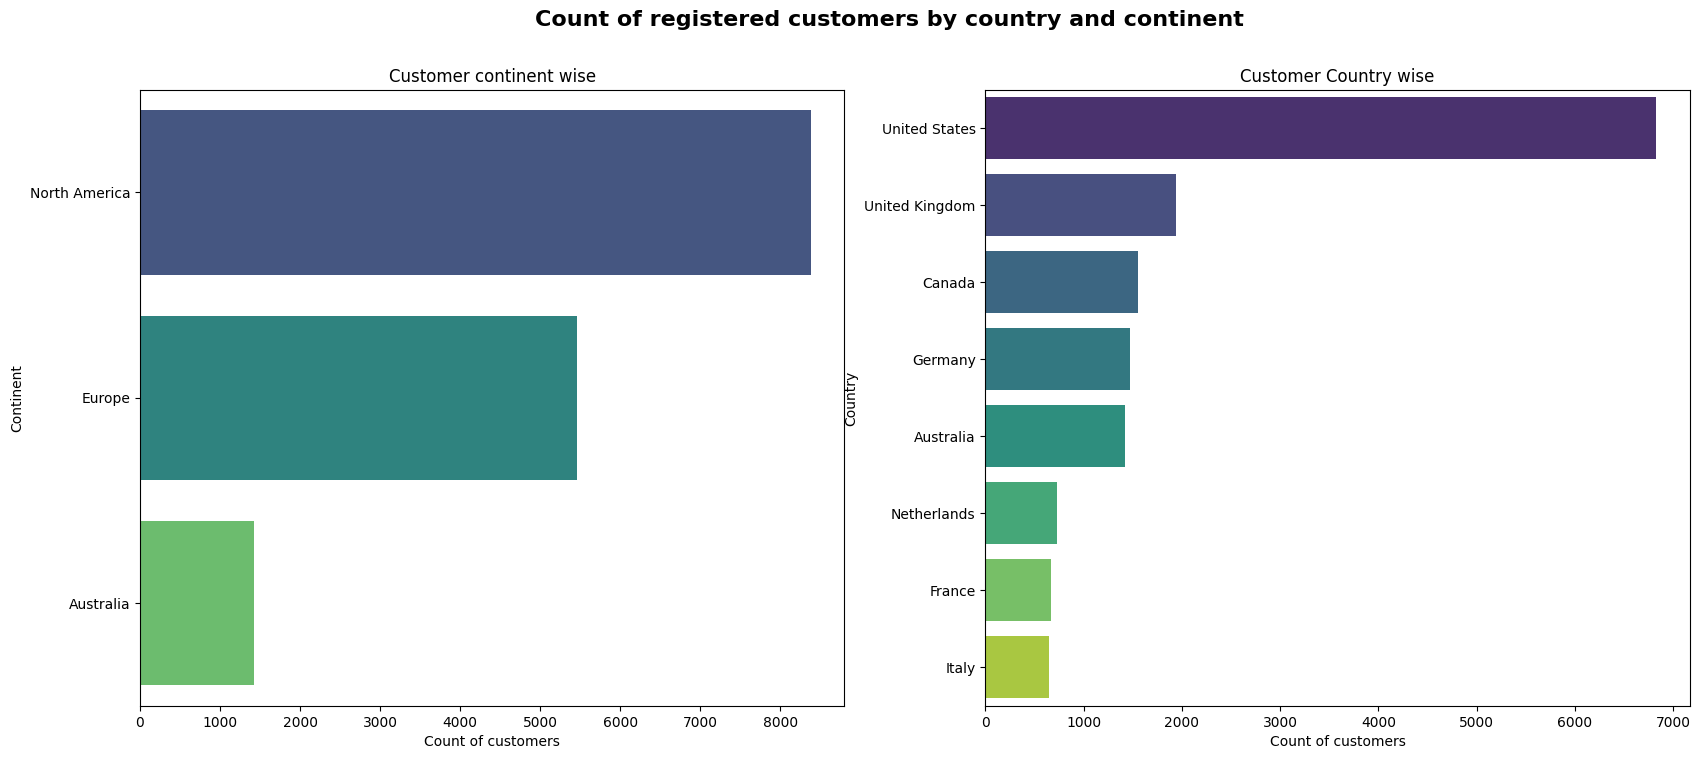

In [213]:
# Showing customer spread continent and country wise per registered users

plt.figure(figsize=(20,8)).suptitle("Count of registered customers by country and continent", fontsize = 16, fontweight = 'bold')

plt.subplot(1,2,1)
sns.countplot(data = cust['Continent'], palette='viridis', order = cust['Continent'].value_counts().index)
plt.title("Customer continent wise")
plt.xlabel("Count of customers")

plt.subplot(1,2,2)
sns.countplot(data = cust['Country'], palette='viridis', order = cust['Country'].value_counts().index)
plt.title("Customer Country wise")
plt.xlabel("Count of customers")

plt.show()

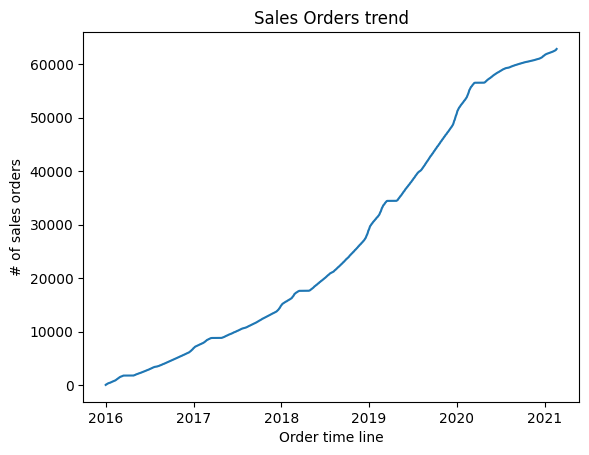

In [214]:
#plotting orders trend chart to see the initial behaviour
sns.lineplot(data = sales, x= 'Order Date', y = sales.index)
plt.title("Sales Orders trend")
plt.xlabel("Order time line")
plt.ylabel("# of sales orders")
plt.show()

As we can observe from the above sales order trend that the orders spike growth is not that sharp with no much improvement in the year 2020-2021. We can analyse further to understand this more.

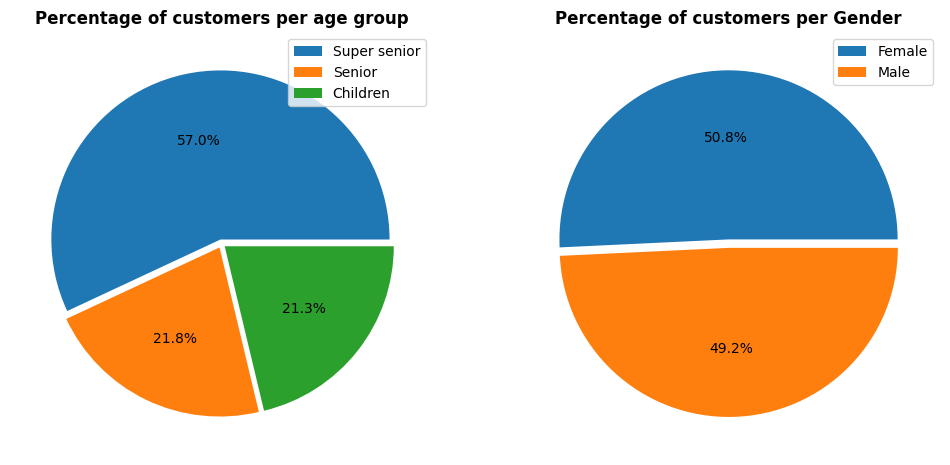

In [215]:
## Plotting the customer age group and gender they fall into

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.pie(cust['Age_group'].value_counts(), autopct = '%.1f%%',
        explode = [0.025] * len(cust['Age_group'].value_counts()) )
plt.legend(cust['Age_group'].unique())
plt.title("Percentage of customers per age group", fontweight='bold')

plt.subplot(1,2,2)
plt.pie(cust['Gender'].value_counts(), autopct = '%.1f%%',
        explode = [0.025] * len(cust['Gender'].value_counts()) )
plt.legend(cust['Gender'].unique())
plt.title("Percentage of customers per Gender", fontweight='bold')


plt.show()

With the above analysis we can understand that close to 57% of the customers are Super senior citizens and with ~22% each for senior citizens and children. And gender wise we have almost equal share of customers.

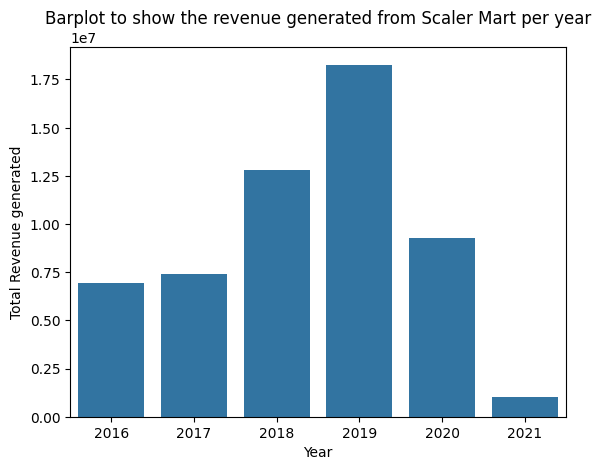

In [216]:
sns.barplot(data = revenue_per_year, x= 'Year', y='Revenue_generated')
plt.title("Barplot to show the revenue generated from Scaler Mart per year")
plt.ylabel("Total Revenue generated")
plt.show()

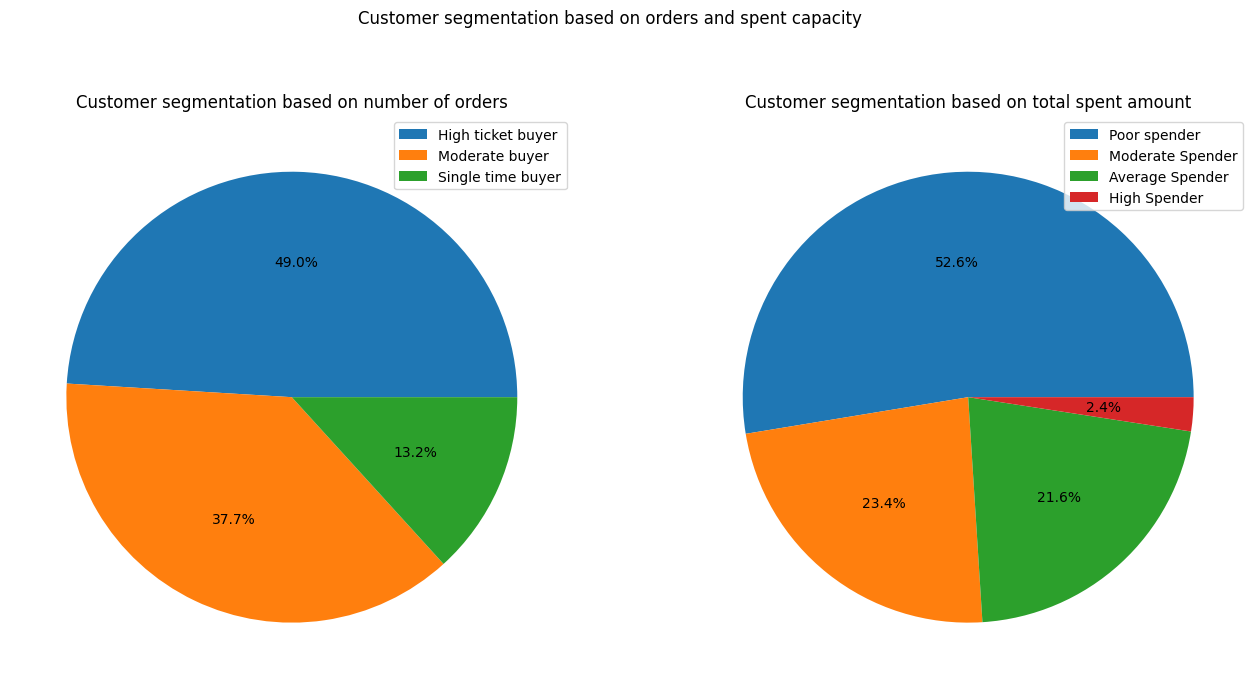

In [249]:
# Pie chart based on customer segmentation for number of orders and spent capacity

plt.figure(figsize=(16,8)).suptitle("Customer segmentation based on orders and spent capacity")

plt.subplot(1,2,1)
plt.pie(total_customer_purcahse['cust_segment'].value_counts(), autopct = '%.1f%%')
plt.legend(total_customer_purcahse['cust_segment'].unique())
plt.title("Customer segmentation based on number of orders")

plt.subplot(1,2,2)
plt.pie(full_df['Purchase_Capacity'].value_counts(), autopct = '%.1f%%')
plt.legend(full_df['Purchase_Capacity'].unique())
plt.title("Customer segmentation based on total spent amount")
plt.show()

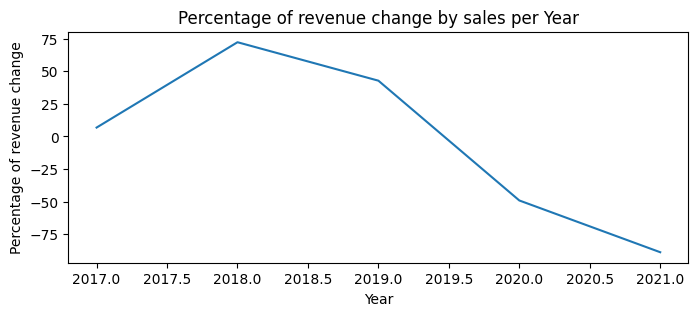

In [217]:
#plotting orders trend chart to see the initial behaviour
plt.figure(figsize = (8,3))
sns.lineplot(data = revenue_per_year, x= 'Year', y = 'Percentage_change')
plt.title("Percentage of revenue change by sales per Year")
plt.xlabel("Year")
plt.ylabel("Percentage of revenue change")
plt.show()

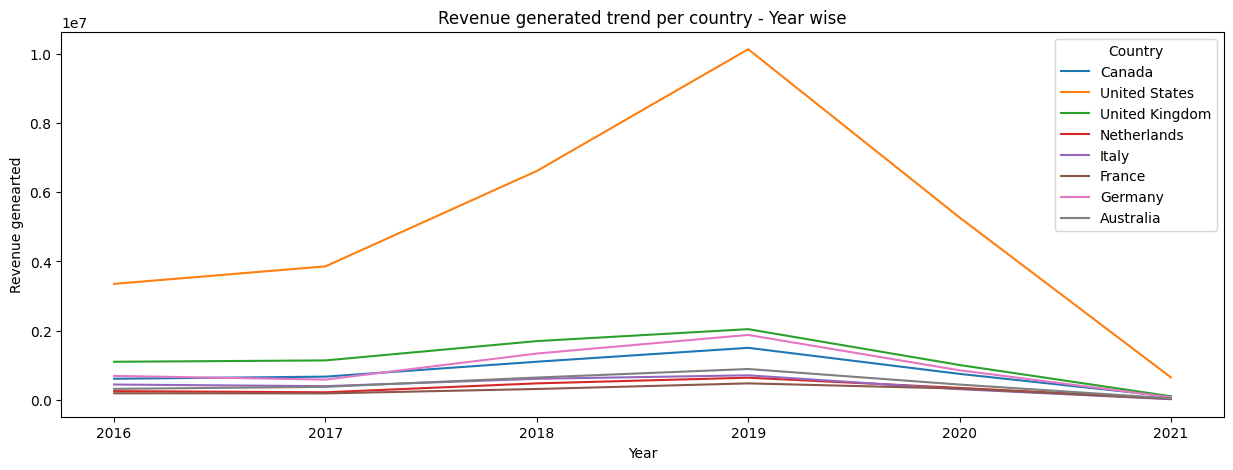

In [218]:
#plotting orders trend chart to see the initial behaviour
plt.figure(figsize = (15,5))
sns.lineplot(data = result_df, x= 'Year', y = 'Total Revenue', hue = 'Country')
plt.title("Revenue generated trend per country - Year wise")
plt.xlabel("Year")
plt.ylabel("Revenue genearted")
plt.show()

As we can see from the above generated graphs and analysis that the customers from USA have declined drastically since 2019 who were the top most active customers with 53% share of the total customer base, followed by UK customers of 13%. So after 2020 even the UK, canada, Netherlands active customers got reduced drastically.

# Hypothesis testing

In [219]:
## to cehck if there is equal variance between  customers from various country
'''
H0: Variance in revenue is equal for all the countries
Ha: Variance in revenue is not equal for all the countries (atleast one of the season has a variance different from the others)

'''
US_count = full_df[full_df['Country']=='United States']['total_price']
UK_count = full_df[full_df['Country']=='United Kingdom']['total_price']
DE_count = full_df[full_df['Country']=='Germany']['total_price']
IT_count = full_df[full_df['Country']=='Italy']['total_price']
NL_count = full_df[full_df['Country']=='Netherlands']['total_price']
FR_count = full_df[full_df['Country']=='France']['total_price']
AU_count = full_df[full_df['Country']=='Australia']['total_price']
CA_count = full_df[full_df['Country']=='Canada']['total_price']

alpha = 0.05

p_val = stats.levene(US_count,UK_count,DE_count,IT_count,NL_count,FR_count,AU_count,CA_count  , center = 'median')[1]

print("P-value:", p_val)

if p_val < alpha:
  print('\033[91m'+ "Variance in revenue is not equal for all the countries (atleast one of the season has a variance different from the others)"+'\033[0m')
else:
  print('\033[92m'+"Variance in revenue is equal for all the countries"+'\033[0m')


P-value: 0.7241448129231223
Variance in revenue is equal for all the countries


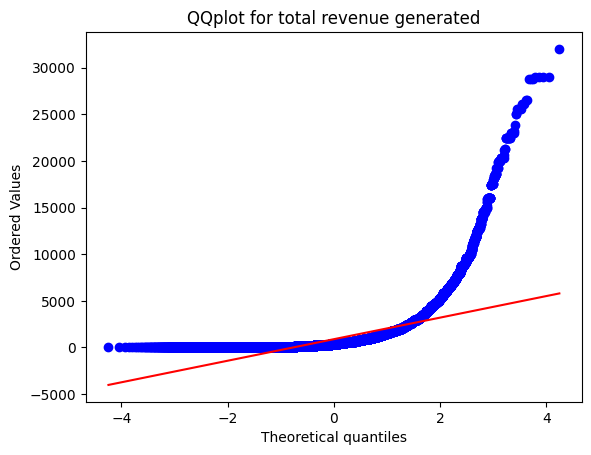

In [220]:
## plot to check if the total rveenue generated is guassian or non gaussian
stats.probplot(full_df['total_price'], dist="norm", plot=plt)
plt.title("QQplot for total revenue generated")
plt.show()

In [221]:
## to validate sattistically if the mean total revenue generated by each country's users are equal or unequal
## We will be using Kruskal-Wallis test to validate statistically if the mean total revenue between each country genearted is same or different

'''
H0: The mean revenue generated by each country is statistically same.
Ha: The mean revenue generated by each country is statistically not the same!
'''

alpha = 0.05

p_val = stats.kruskal(US_count,UK_count,DE_count,IT_count,NL_count,FR_count,AU_count,CA_count)[1]
print("P-value:",p_val)


if p_val < alpha:
  print('\033[91m'+  "The mean revenue generated by each country is statistically not the same!"+'\033[0m')
else:
  print('\033[92m'+"The mean revenue generated by each country is statistically the same."+'\033[0m')

P-value: 0.415667184673785
The mean revenue generated by each country is statistically the same.


In [222]:
## to cehck if there is equal variance between customers from various country during 2019 and 2020
'''
H0: Variance in revenue is equal for all the countries between 2019 and 2020
Ha: Variance in revenue is not equal for all the countries between 2019 and 2020 (atleast one of the season has a variance different from the others)

'''
US_revenue_decline = full_df[(full_df['Country'] == 'United States') & (full_df['Order_year'].isin([2019, 2020]))]['total_price']
UK_revenue_decline = full_df[(full_df['Country'] == 'United Kingdom') & (full_df['Order_year'].isin([2019, 2020]))]['total_price']
DE_revenue_decline = full_df[(full_df['Country'] == 'Germany') & (full_df['Order_year'].isin([2019, 2020]))]['total_price']
IT_revenue_decline = full_df[(full_df['Country'] == 'Italy') & (full_df['Order_year'].isin([2019, 2020]))]['total_price']
NL_revenue_decline = full_df[(full_df['Country'] == 'Netherlands') & (full_df['Order_year'].isin([2019, 2020]))]['total_price']
FR_revenue_decline = full_df[(full_df['Country'] == 'France') & (full_df['Order_year'].isin([2019, 2020]))]['total_price']
AU_revenue_decline = full_df[(full_df['Country'] == 'Australia') & (full_df['Order_year'].isin([2019, 2020]))]['total_price']
CA_revenue_decline = full_df[(full_df['Country'] == 'Canada') & (full_df['Order_year'].isin([2019, 2020]))]['total_price']

alpha = 0.05

p_val = stats.levene(US_revenue_decline,UK_revenue_decline,DE_revenue_decline,IT_revenue_decline,NL_revenue_decline,
                     FR_revenue_decline,AU_revenue_decline,CA_revenue_decline)[1]

print("P-value:", p_val)

if p_val < alpha:
  print('\033[91m'+ "Variance in revenue is not equal for all the countries between 2019 and 2020 (atleast one of the season has a variance different from the others)"+'\033[0m')
else:
  print('\033[92m'+ "Variance in revenue is equal for all the countries between 2019 and 2020"+'\033[0m')


P-value: 0.9249886840452176
Variance in revenue is equal for all the countries between 2019 and 2020


In [223]:
## to validate sattistically if the mean total revenue generated by each country's users between 2019 and 2020 are equal or unequal
## We will be using Kruskal-Wallis test to validate statistically if the mean total revenue between each country generated is same or different

'''
H0: The mean revenue generated by each country between 2019 and 2020 are statistically same.
Ha: The mean revenue generated by each country between 2019 and 2020 are statistically not the same!
'''

alpha = 0.05

p_val = stats.kruskal(US_revenue_decline,UK_revenue_decline,DE_revenue_decline,IT_revenue_decline,NL_revenue_decline,
                     FR_revenue_decline,AU_revenue_decline,CA_revenue_decline)[1]
print("P-value:",p_val)


if p_val < alpha:
  print('\033[91m'+ "The mean revenue generated by each country between 2019 and 2020 are statistically not the same!" +'\033[0m')
else:
  print('\033[92m'+ "The mean revenue generated by each country between 2019 and 2020 are statistically same."+'\033[0m')

P-value: 0.7898478312446732
The mean revenue generated by each country between 2019 and 2020 are statistically same.


**Insights:**



1.   The customer registered are almost ~50% make and 50% female.
2.   There are 3379 customers who are inactive customers currently!
3.   The data collected is for 3 continents and 8 countries.
4.   The majority of the purchasers/customers are from USA followed by UK, canada,germany and Italy.
5.    57% of the customers are Super senior citizens and with ~22% each for senior citizens and children.
6. We also have a point to mention that the data for 2021 is just for 2 months, so it is wrong to interpret any information with regards to 2021 in the above analysed report.




**Recommendations:**


1.   Make sure the registered customers have purchased even a single product so that you can increase your sales as such.
2.   Increase your customer base towards more among adults and Youth, so that the online sales are increased with new generation people.
3.   Introduce more children friendly electornic products so that the purchasing of children also increases.
4.   Give any favourable discounts/offers for High ticket buyers and High spenders, so that the total revenue keep increases.
5.   Implement recommender system in the application if its not available.
6.   Try not to loose customers in USA and UK as that is the major spend base for this platform.
7.   Slowly increase market share in Australia and Italy. As Italy looks like agood market for this application but there are limited buyers.

